In [92]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

Data Set Information:
=============
This dataset is composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes. 

Columns in the table contain subject number, subject age, subject gender, time interval from baseline recruitment date, motor UPDRS, total UPDRS, and 16 biomedical voice measures. Each row corresponds to one of 5,875 voice recording from these individuals. The main aim of the data is to predict the motor and total UPDRS scores ('motor_UPDRS' and 'total_UPDRS') from the 16 voice measures. 

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around 200 recordings per patient, the subject number of the patient is identified in the first column. For further information or to pass on comments, please contact Athanasios Tsanas (tsanasthanasis '@' gmail.com) or Max Little (littlem '@' physics.ox.ac.uk). 

Further details are contained in the following reference -- if you use this dataset, please cite: 
Athanasios Tsanas, Max A. Little, Patrick E. McSharry, Lorraine O. Ramig (2009), 
'Accurate telemonitoring of Parkinson’s disease progression by non-invasive speech tests', 
IEEE Transactions on Biomedical Engineering (to appear). 

Further details about the biomedical voice measures can be found in: 
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2009), 
'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', 
IEEE Transactions on Biomedical Engineering, 56(4):1015-1022 


*Attribute Information*:
========================
subject# - Integer that uniquely identifies each subject <br>
age - Subject age <br>
sex - Subject gender '0' - male, '1' - female <br>
test_time - Time since recruitment into the trial. The integer part is the number of days since recruitment. <br>
motor_UPDRS - Clinician's motor UPDRS score, linearly interpolated <br>
total_UPDRS - Clinician's total UPDRS score, linearly interpolated <br>
Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP - Several measures of variation in fundamental frequency <br>
Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA - Several measures of variation in amplitude <br>
NHR,HNR - Two measures of ratio of noise to tonal components in the voice <br>
RPDE - A nonlinear dynamical complexity measure <br>
DFA - Signal fractal scaling exponent <br>
PPE - A nonlinear measure of fundamental frequency variation <br>

In [62]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data")

In [7]:
df.head(20)

subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0          1   72    0     5.6431       28.199       34.398    0.00662   
1          1   72    0    12.6660       28.447       34.894    0.00300   
2          1   72    0    19.6810       28.695       35.389    0.00481   
3          1   72    0    25.6470       28.905       35.810    0.00528   
4          1   72    0    33.6420       29.187       36.375    0.00335   
5          1   72    0    40.6520       29.435       36.870    0.00353   
6          1   72    0    47.6490       29.682       37.363    0.00422   
7          1   72    0    54.6400       29.928       37.857    0.00476   
8          1   72    0    61.6690       30.177       38.353    0.00432   
9          1   72    0    68.6880       30.424       38.849    0.00496   
10         1   72    0    75.6530       30.670       39.340    0.00465   
11         1   72    0    82.6530       30.917       39.834    0.00537   
12         1   72    0    89.6350       31.309       40.412    0.00524   
13         1   72    0    96.6330       31.776       41.034    0.00354   
14         1   72    0   103.6400       32.243       41.657    0.00530   
15         1   72    0   110.6500       32.710       42.280    0.00456   
16         1   72    0   117.6600       33.178       42.904    0.00693   
17         1   72    0   124.6400       33.643       43.524    0.00652   
18         1   72    0   131.6400       34.109       44.146    0.00571   
19         1   72    0   139.6900       34.646       44.861    0.00372   

    Jitter(Abs)  Jitter:RAP  Jitter:PPQ5   ...     Shimmer(dB)  Shimmer:APQ3  \
0      0.000034     0.00401      0.00317   ...           0.230       0.01438   
1      0.000017     0.00132      0.00150   ...           0.179       0.00994   
2      0.000025     0.00205      0.00208   ...           0.181       0.00734   
3      0.000027     0.00191      0.00264   ...           0.327       0.01106   
4      0.000020     0.00093      0.00130   ...           0.176       0.00679   
5      0.000023     0.00119      0.00159   ...           0.214       0.01006   
6      0.000024     0.00212      0.00221   ...           0.445       0.02376   
7      0.000025     0.00226      0.00259   ...           0.212       0.00979   
8      0.000029     0.00156      0.00207   ...           0.371       0.01774   
9      0.000027     0.00258      0.00253   ...           0.310       0.02030   
10     0.000026     0.00238      0.00260   ...           0.188       0.01069   
11     0.000032     0.00236      0.00278   ...           0.282       0.01001   
12     0.000033     0.00235      0.00251   ...           0.240       0.01176   
13     0.000024     0.00142      0.00150   ...           0.171       0.00847   
14     0.000032     0.00241      0.00231   ...           0.291       0.01310   
15     0.000029     0.00152      0.00194   ...           0.264       0.01379   
16     0.000039     0.00329      0.00285   ...           0.274       0.01468   
17     0.000038     0.00313      0.00311   ...           0.320       0.01603   
18     0.000037     0.00296      0.00293   ...           0.223       0.01260   
19     0.000022     0.00181      0.00195   ...           0.288       0.01458   

    Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0        0.01309        0.01662      0.04314  0.014290  21.640  0.41888   
1        0.01072        0.01689      0.02982  0.011112  27.183  0.43493   
2        0.00844        0.01458      0.02202  0.020220  23.047  0.46222   
3        0.01265        0.01963      0.03317  0.027837  24.445  0.48730   
4        0.00929        0.01819      0.02036  0.011625  26.126  0.47188   
5        0.01337        0.02263      0.03019  0.009438  22.946  0.53949   
6        0.02621        0.03488      0.07128  0.013260  22.506  0.49250   
7        0.01462        0.01911      0.02937  0.027969  22.929  0.47712   
8        0.02134        0.03451      0.05323  0.013381  22.078  0.51563   
9        0.01970  

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
subject#         5875 non-null int64
age              5875 non-null int64
sex              5875 non-null int64
test_time        5875 non-null float64
motor_UPDRS      5875 non-null float64
total_UPDRS      5875 non-null float64
Jitter(%)        5875 non-null float64
Jitter(Abs)      5875 non-null float64
Jitter:RAP       5875 non-null float64
Jitter:PPQ5      5875 non-null float64
Jitter:DDP       5875 non-null float64
Shimmer          5875 non-null float64
Shimmer(dB)      5875 non-null float64
Shimmer:APQ3     5875 non-null float64
Shimmer:APQ5     5875 non-null float64
Shimmer:APQ11    5875 non-null float64
Shimmer:DDA      5875 non-null float64
NHR              5875 non-null float64
HNR              5875 non-null float64
RPDE             5875 non-null float64
DFA              5875 non-null float64
PPE              5875 non-null float64
dtypes: float64(19), int64(3)
memory usag

In [9]:
df.describe()

subject#          age          sex    test_time  motor_UPDRS  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     21.494128    64.804936     0.317787    92.863722    21.296229   
std      12.372279     8.821524     0.465656    53.445602     8.129282   
min       1.000000    36.000000     0.000000    -4.262500     5.037700   
25%      10.000000    58.000000     0.000000    46.847500    15.000000   
50%      22.000000    65.000000     0.000000    91.523000    20.871000   
75%      33.000000    72.000000     1.000000   138.445000    27.596500   
max      42.000000    85.000000     1.000000   215.490000    39.511000   

       total_UPDRS    Jitter(%)  Jitter(Abs)   Jitter:RAP  Jitter:PPQ5  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     29.018942     0.006154     0.000044     0.002987     0.003277   
std      10.700283     0.005624     0.000036     0.003124     0.003732   
min       7.000000     0.000830     0.000002     0.000330     0.000430   
25%      21.371000     0.003580     0.000022     0.001580     0.001820   
50%      27.576000     0.004900     0.000035     0.002250     0.002490   
75%      36.399000     0.006800     0.000053     0.003290     0.003460   
max      54.992000     0.099990     0.000446     0.057540     0.069560   

          ...       Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  Shimmer:APQ11  \
count     ...       5875.000000   5875.000000   5875.000000    5875.000000   
mean      ...          0.310960      0.017156      0.020144       0.027481   
std       ...          0.230254      0.013237      0.016664       0.019986   
min       ...          0.026000      0.001610      0.001940       0.002490   
25%       ...          0.175000      0.009280      0.010790       0.015665   
50%       ...          0.253000      0.013700      0.015940       0.022710   
75%       ...          0.365000      0.020575      0.023755       0.032715   
max       ...          2.107000      0.162670      0.167020       0.275460   

       Shimmer:DDA          NHR          HNR         RPDE          DFA  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean      0.051467     0.032120    21.679495     0.541473     0.653240   
std       0.039711     0.059692     4.291096     0.100986     0.070902   
min       0.004840     0.000286     1.659000     0.151020     0.514040   
25%       0.027830     0.010955    19.406000     0.469785     0.596180   
50%       0.041110     0.018448    21.920000     0.542250     0.643600   
75%       0.061735     0.031463    24.444000     0.614045     0.711335   
max       0.488020     0.748260    37.875000     0.966080     0.865600   

               PPE  
count  5875.000000  
mean      0.219589  
std       0.091498  
min       0.021983  
25%       0.156340  
50%       0.205500  
75%       0.264490  
max       0.731730  

[8 rows x 22 columns]

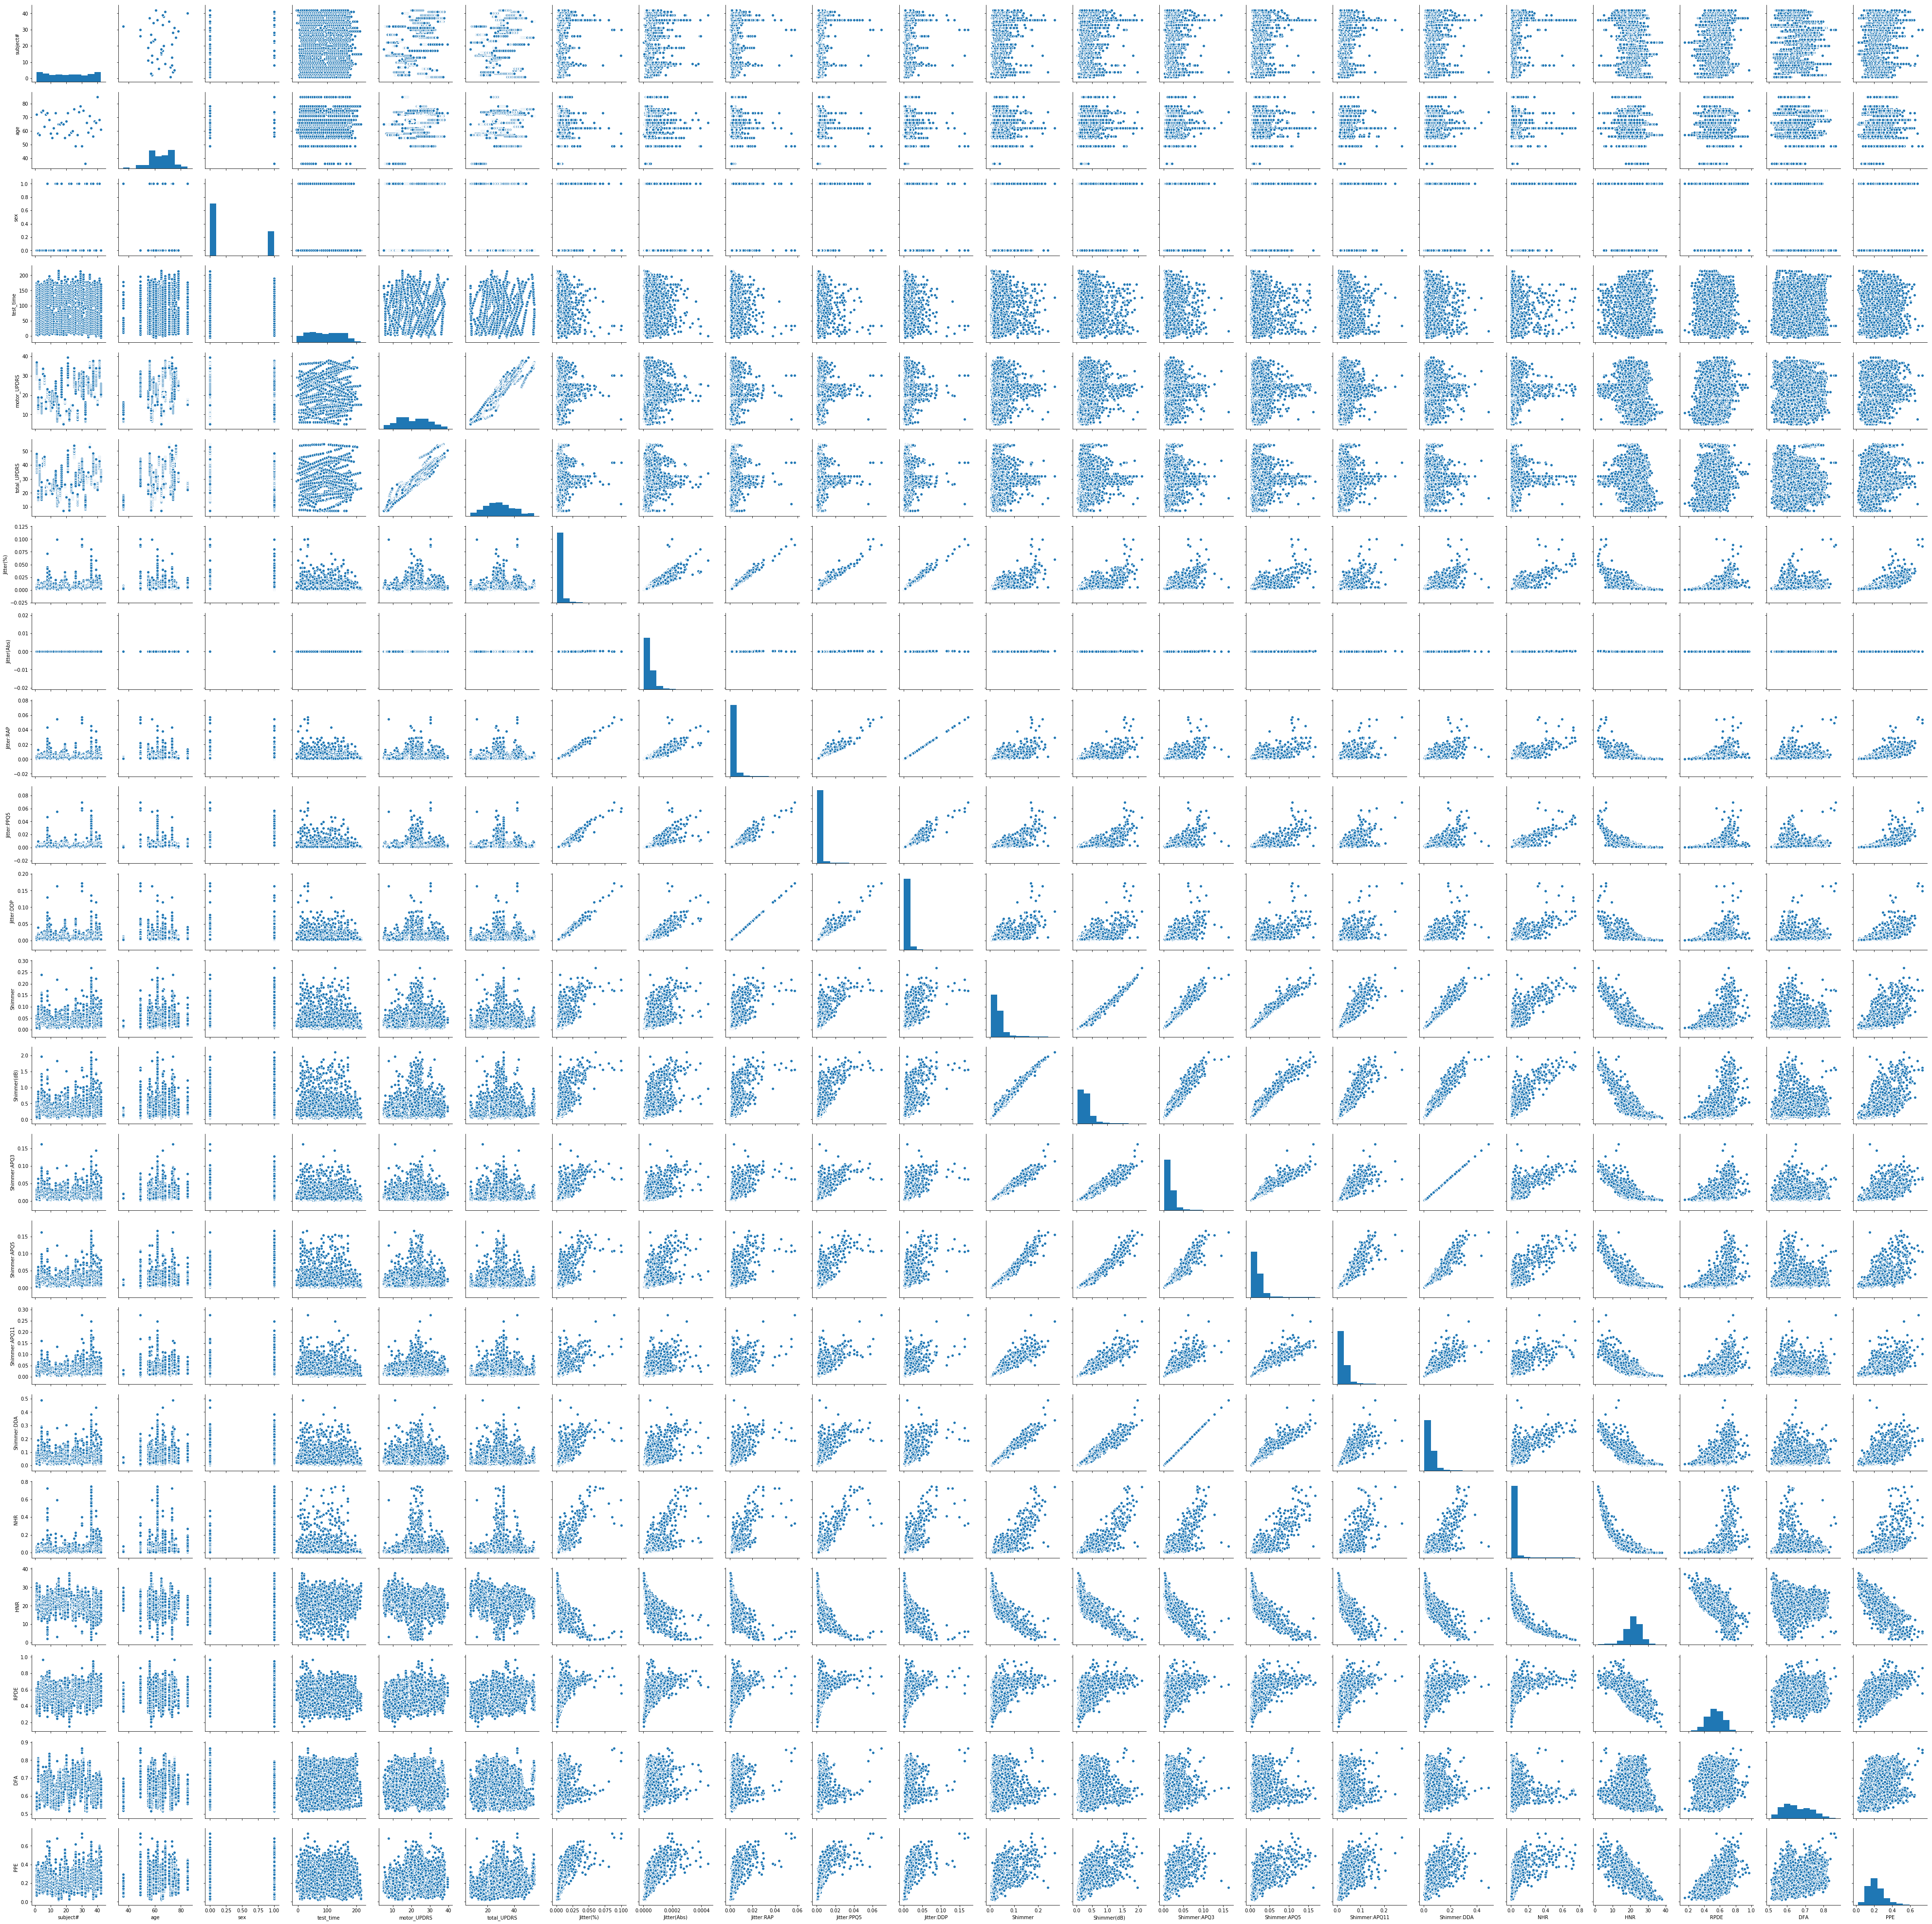

In [10]:
sb.pairplot(df)
#не очень показательно применять пеирплот(но видно, что 'RPDE’ and ‘PPE’ нормально распредлены) из-за большого количества переменных, посмотрим на хитмап

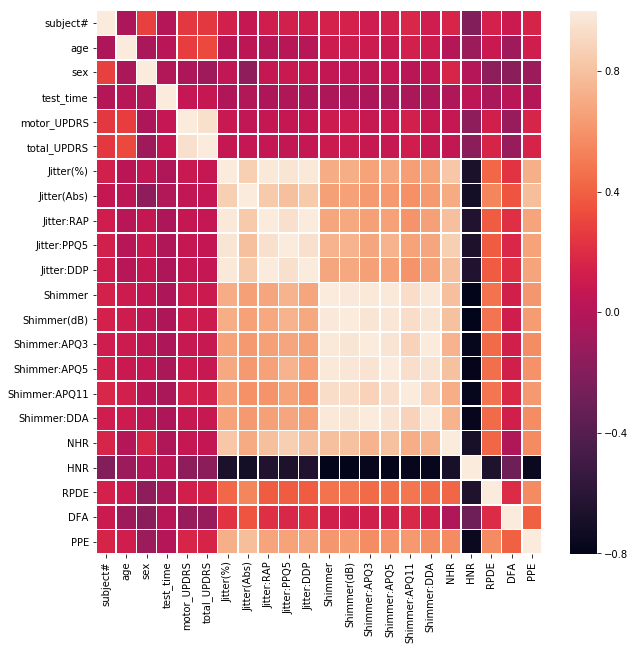

In [32]:
fig, ax = plt.subplots(figsize=(10,10)) 
corr = df.corr()
sb.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           linewidths=.5, ax=ax
          )

In [ ]:
#видим по графикам что мультиколл. Shimmer:APQ5, Jitter:DDP


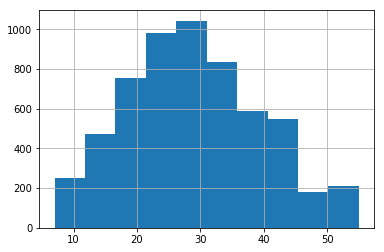

In [18]:
df['total_UPDRS'].hist()
#Построим Гистрограмму по нашей таргет переменной 

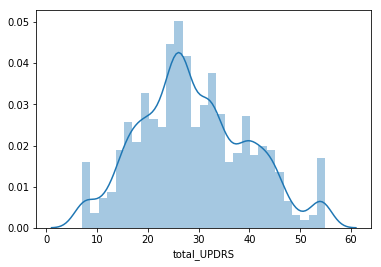

In [42]:
sb.distplot(df['total_UPDRS'])
#похоже на нормальное распределение, но отдаленно :)

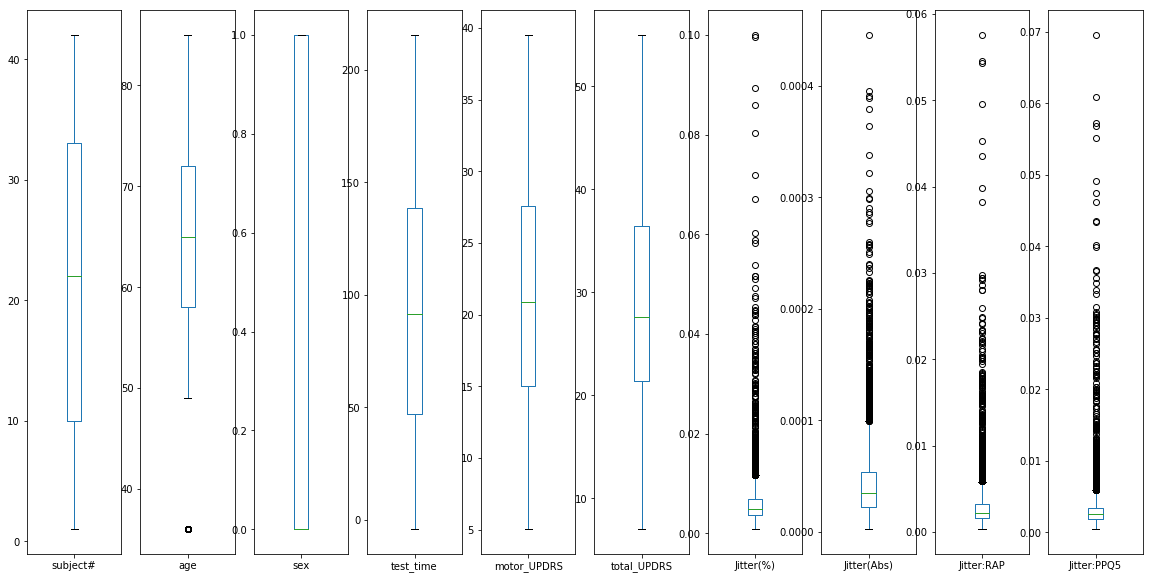

In [30]:
ax = df[df.columns[:10]].plot(subplots=True, kind='box', figsize=(20,10))

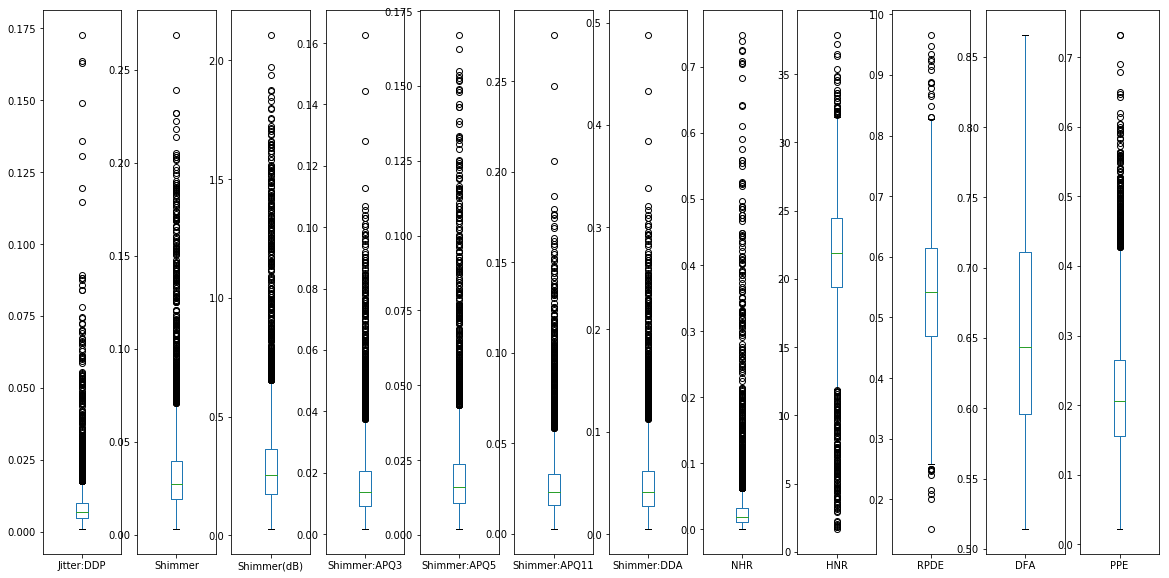

In [37]:
#аутлаеры по искомому 'motor_UPDRS','total_UPDRS' отсуствуют
ax2 = df[df.columns[10:]].plot(subplots=True, kind='box', figsize=(20,10))

In [63]:
y = df.loc[:,'total_UPDRS']
df = df[[x for x in df.columns if x not in ['motor_UPDRS','total_UPDRS','Shimmer:APQ5', 'Jitter:DDP']]]


In [76]:
#Скор для регрессии стандартный - коэффициент детерминации
from sklearn import metrics


In [104]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
model.score(X_test, y_test)
predicted = cross_val_predict(lm, df, y, cv=2000) 
metrics.r2_score(y, predicted)

0.24457672703253364

In [106]:
lasso = Lasso()
model_2 = lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)
model_2.score(X_test, y_test)
predicted = cross_val_predict(lasso, df, y, cv=2000) 
metrics.r2_score(y, predicted)

0.1723959278842745

In [117]:
def rfr_model(X, y):
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, 
        scoring='r2', 
        verbose=0,                         
        n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    print(grid_result)
    rfr = RandomForestRegressor(max_depth=grid_result.best_params_ ["max_depth"], n_estimators=grid_result.best_params_["n_estimators"], random_state=False, verbose=False)
    scores = cross_val_predict(rfr, X, y, cv=10)

    return scores

predicted = rfr_model(df, y)
metrics.r2_score(y, predicted)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(3, 7), 'n_estimators': (10, 50, 100, 1000)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)


-0.4988182114237931

In [ ]:
#В итоге лучше всего отработала обычная линейная регрессия